<a href="https://colab.research.google.com/github/rocholaky/Mineria-de-datos-2021/blob/main/Hito1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito1: Proyecto Base de datos Covid Ministerio de Ciencias.
En el presente informe, se especifica el trabajo realizado en el dataset sobre covid 19 del ministerio de ciencias, donde se abordará la exploración de datos hecha para este repositorio.

El repositorio consta de 83 tablas donde cada una especifica cierto tipo de información que se ha extraido de documentos oficiales del gobierno o entidades de salud. El repositorio puede ser encontrado en el siguiente link: [Repositorio del ministerio de ciencias](https://github.com/MinCiencia/Datos-COVID19)



# Introducción 
No es sorpresa que uno de los sucesos históricos que más ha afectado en nuestra época es la pandemia de Covid-19. Esta ha generado la [muerte de más de 2,997,703 personas en todo el mundo](https://www.worldometers.info/coronavirus/?utm_campaign=homeAdUOA?Si) y el encierro de gran parte de la población por no solo días, sino que meses. Dentro de este contexto de incertidumbre, se ha hecho imperiosa la necesidad de entender el virus desde los datos, para así poder tener políticas de salud acordes y evitar el contagio de la población. Ya habiendo pasado un año desde el inicio de la pandemia, se puede decir que se conoce en cierto modo, mucho mejor los efectos y formas de contagio del virus Covid, pero con el aumento de casos en ciertas localidades además de el descubrimiento de nuevas variantes del virus, el análisis constante de esta enfermedad sigue siendo prioritario para no solo entender como se propaga sino que poder sospechar de la creación de nuevas cepas las que puedan cambiar la situación de medidas sanitarias o incluso la vacuna. 

# Motivación
En el marco del proyecto del curso de Introducción a la minería de datos, se eligió este dataset ya que se cree fehacientemente que el mayor entendimiento del covid desde el data sciente puede llevar a entender problemas que se han generado en distintas partes del mundo. En específico el interés radica en entender la pandemia a nivel nacional, ya que se cree mediante los datos es posible dar respuesta a problematicas tales como el alto aumento de casos que incluso ha llevado de vuelta a varias comunas a cuarentena. En esta linea es necesario poder estudiar en profundidad el comportamiento del virus para así poder entender y analizar tanto políticas sanitarias como otras medidas tomadas por el gobierno. Debido a esto, se espera encontrar patrones que permitan entender que tipo de acciones lleva a que empeore la situación del covid en las distintas regiones, para así, mediante un modelo entender los efectos de distintas varibles importantes como son: movilidad, muertes, contagios diarios, casos activos diarios, casos asintomáticos, entre otros. 

<a href="https://colab.research.google.com/github/rocholaky/Mineria-de-datos-2021/blob/master/Hito1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [20]:
# descargamos el repo en el colab: 
!git clone https://github.com/rocholaky/Mineria-de-datos-2021
%cd  Mineria-de-datos-2021


C:\Users\HP\Documents\GitHub\Mineria-de-datos-2021\Mineria-de-datos-2021


Cloning into 'Mineria-de-datos-2021'...


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from utils import dataRetrieval, util_plot
import seaborn as sns

In [25]:
dataRetrieval.get_MP

<function utils.dataRetrieval.get_MP(particulado='2.5', año='2019')>

# Análisis

Para poder realizar un análisis exhaustivo, primero se deben reconocer factores que empíricamente son indices de la evolución de una pandemia. Es por esto que la natalidad, la mortalidad, el transporte y la cantidad de contagios tanto activos como históricos, son piezas de relevancia en el estudio de la propagación y el entendimiento del virus.

Así tambien, el intervalo de tiempo asignado es importante, es por esto que los datos que se muestran a continuación estan situados en su extensa mayoria entre 2019 y la actualidad. Un poco antes y el durante de la pandemia hasta la fecha.

<!-- Inserta algo de texto roberto -->

# Análisis Roberto

In [ ]:
fallecimientos = dataRetrieval.get_fallecimiento_etario()

# Análisis Sebastían 

<!-- Intro Seba-->
Despues del análisis de fallecimientos por edad, contagios diarios y vacunaciones, es posible notar tambien los nacimientos como factor de cambio en la demografía de la población chilena durante la pandemia, por esto a continuación se muestran datos relacionados a los nacimientos en chile segmentados por región en el tiempo, especificamente en meses.

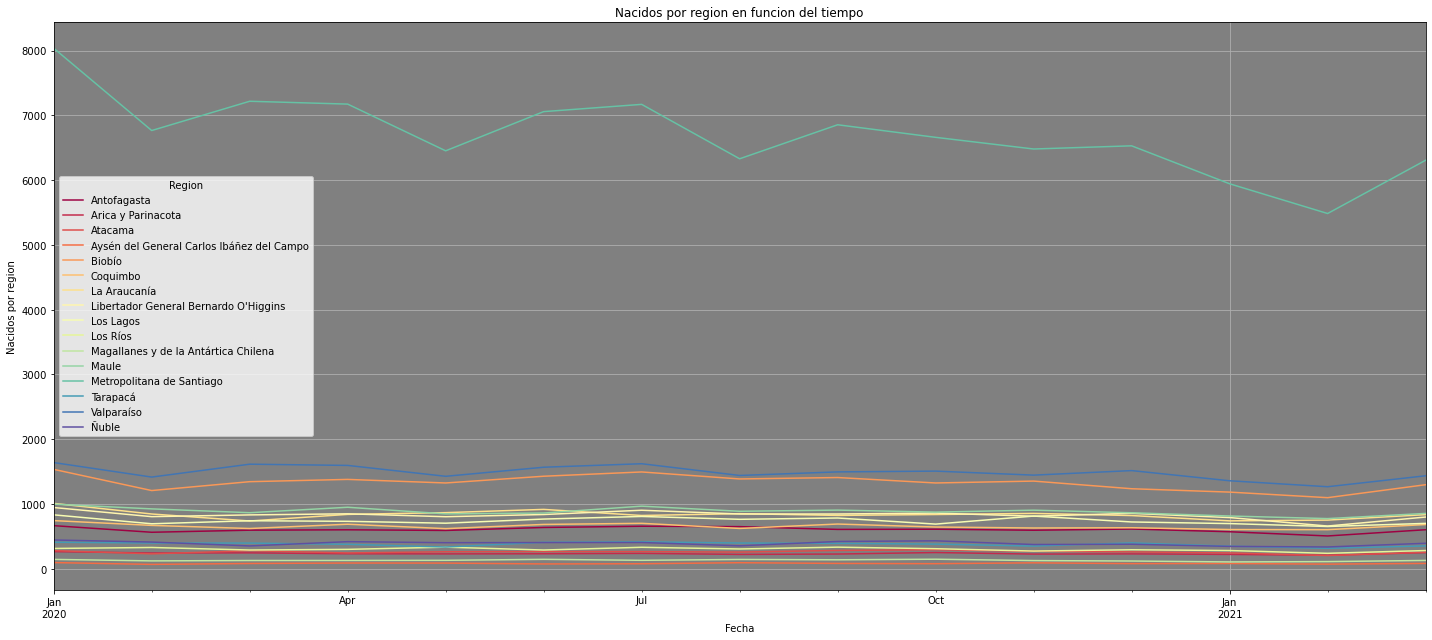

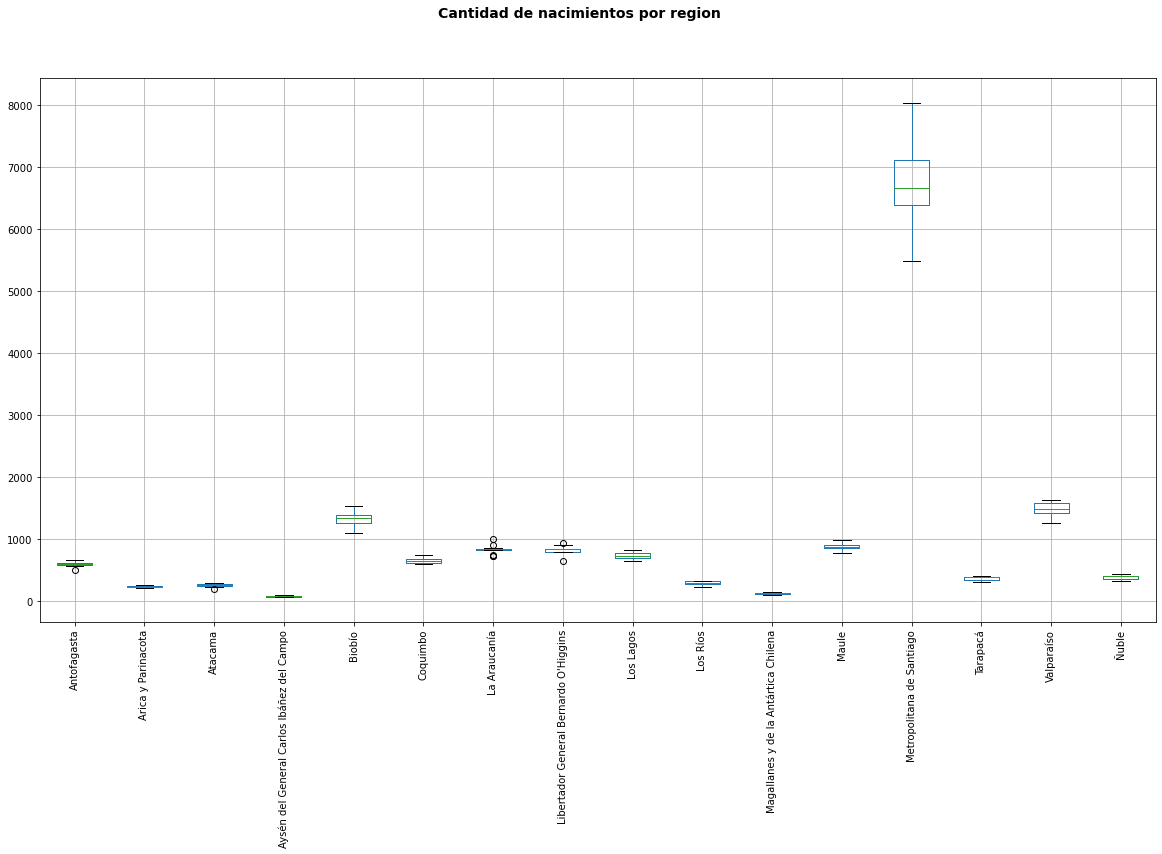

In [2]:
###### Data Product 31 - Nacimientos en Chile #################################
nac_x_reg1 = dataRetrieval.get_nacimientos2020()
nac_x_reg2 = dataRetrieval.get_nacimientos2021()
#print(nacimientos_x_region1)
nac_x_reg1 = nac_x_reg1.drop(["Codigo comuna","Codigo region"], axis=1).groupby("Region").sum().transpose()
nac_x_reg2 = nac_x_reg2.drop(["Codigo comuna","Codigo region"], axis=1).groupby("Region").sum().transpose()
nac_x_reg = pd.concat([nac_x_reg1,nac_x_reg2], axis=0)
# # volvemos los indices a datetime
nac_x_reg.index = pd.to_datetime(list(nac_x_reg.index.values))
#Agrupamos por mes
nac_x_reg=nac_x_reg.resample('M').sum()
#Sacamos el último mes, porque aun no estan completos los datos
nac_x_reg = nac_x_reg.head(-1) #No estan completos los datos del mes actual
#Ploteaos la serie de tiempo y su boxplot.
util_plot.plot_df(nac_x_reg, "Nacidos por region en funcion del tiempo", "Nacidos por region" , legend = False)
util_plot.box_plot_df(nac_x_reg, "Cantidad de nacimientos por region")
#Obs: Al igual que en el análisis de residencias, puede ser conveniente normalizar
#los datos respecto al volumen poblacional con alguna métrica.

Se puede dar cuenta de una diferencia de poco mas de 5000 nacimientos en promedio en la región Metropolitana de Santiago, que en el resto de regiones estudiadas, que de hecho más del doble de la región con más nacimientos que le sigue a la Metropolitana, es por esto que para el hito 2 y posteriores análisis, se espera normalizar bajo una tasa preformulada, la proporción relativa de nacimientos por región y no la absoluta. Así tambien se puede ver en el boxplot, que la cantidad de nacimientos no tuvo outliers tan considerables en las distintas regiones, pero es posible para futuros análisis, verificar a que se deben los outliers a pesar de ser redusidos.

Para dar otro paso en la visualización, de la mano a lo que veremos más adelante como el transporte y la movilidad, una hipotesis plausible que podría verse afectada y/o afectar a la evolución del virus, es la evolución de la calidad del aire. El material particulado en una habitación puede dificultar la respiración y provocar mayor obstrucción de las vías respiratorias a largo plazo, ó a menor plazo si se posee una enfermedad respiratoria poco predecible, como el COVID-19, es por esto que cae de cajón revisar como el material particulado de 10 y 2.5 micrometros a cambiado en cada región durante la pandemia. 

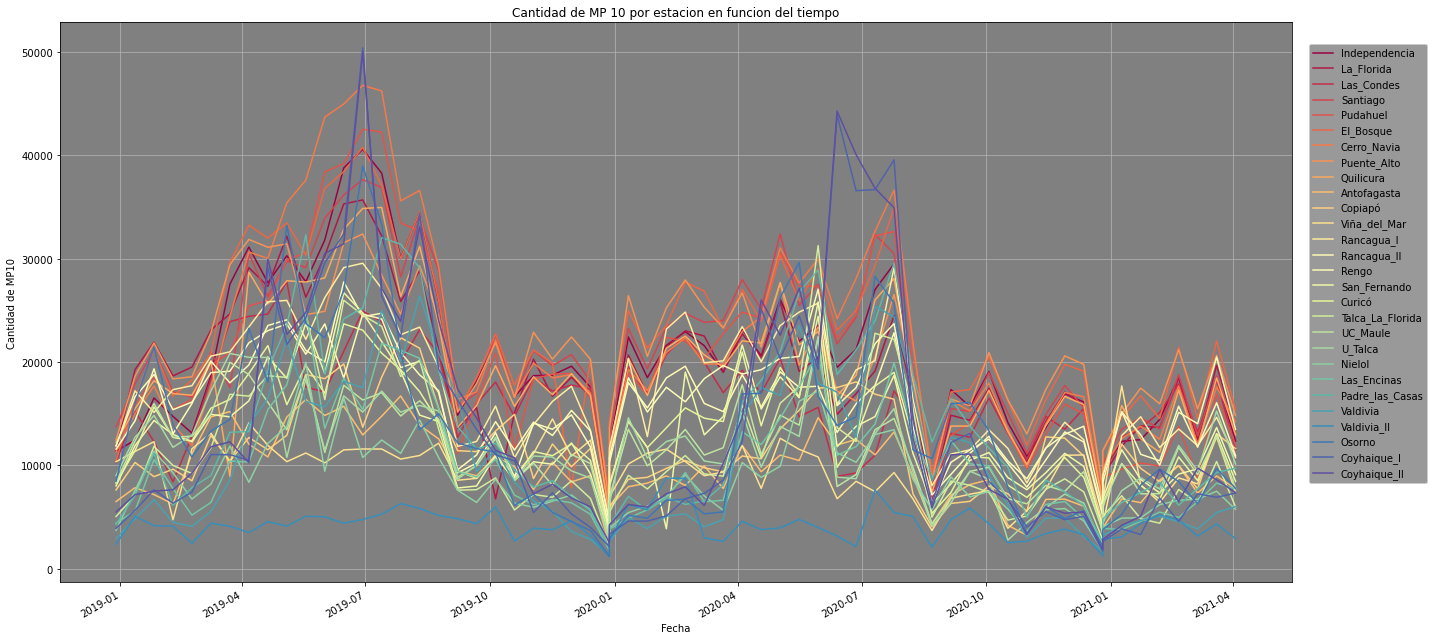

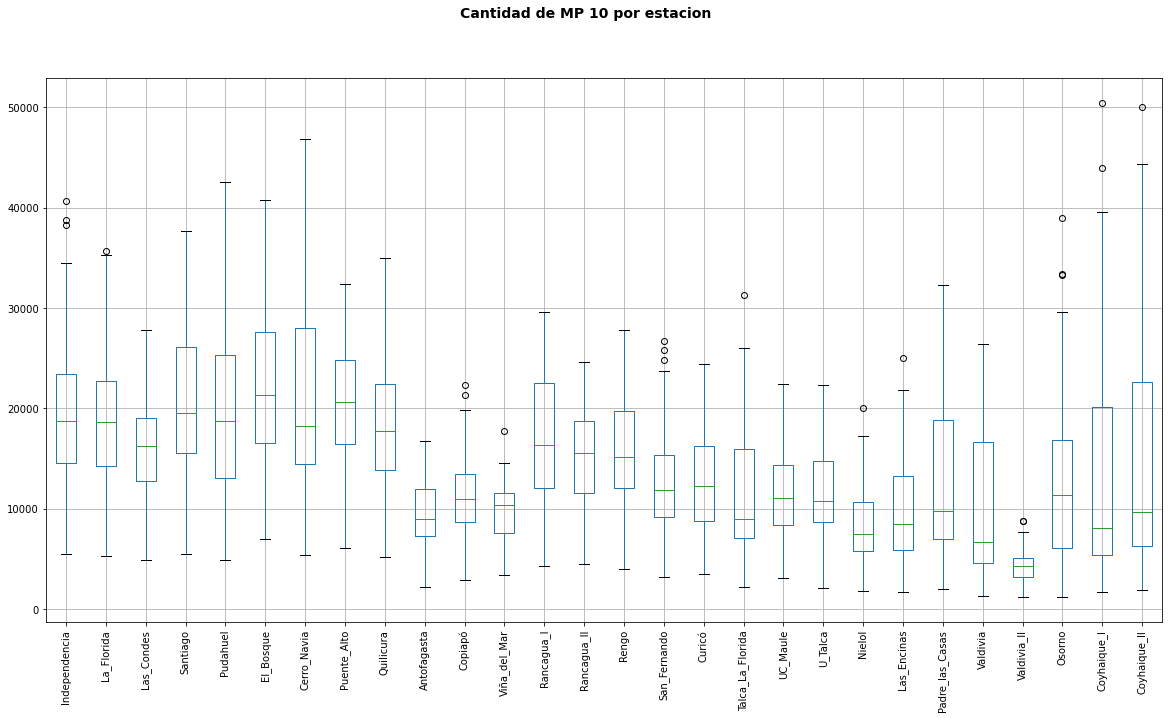

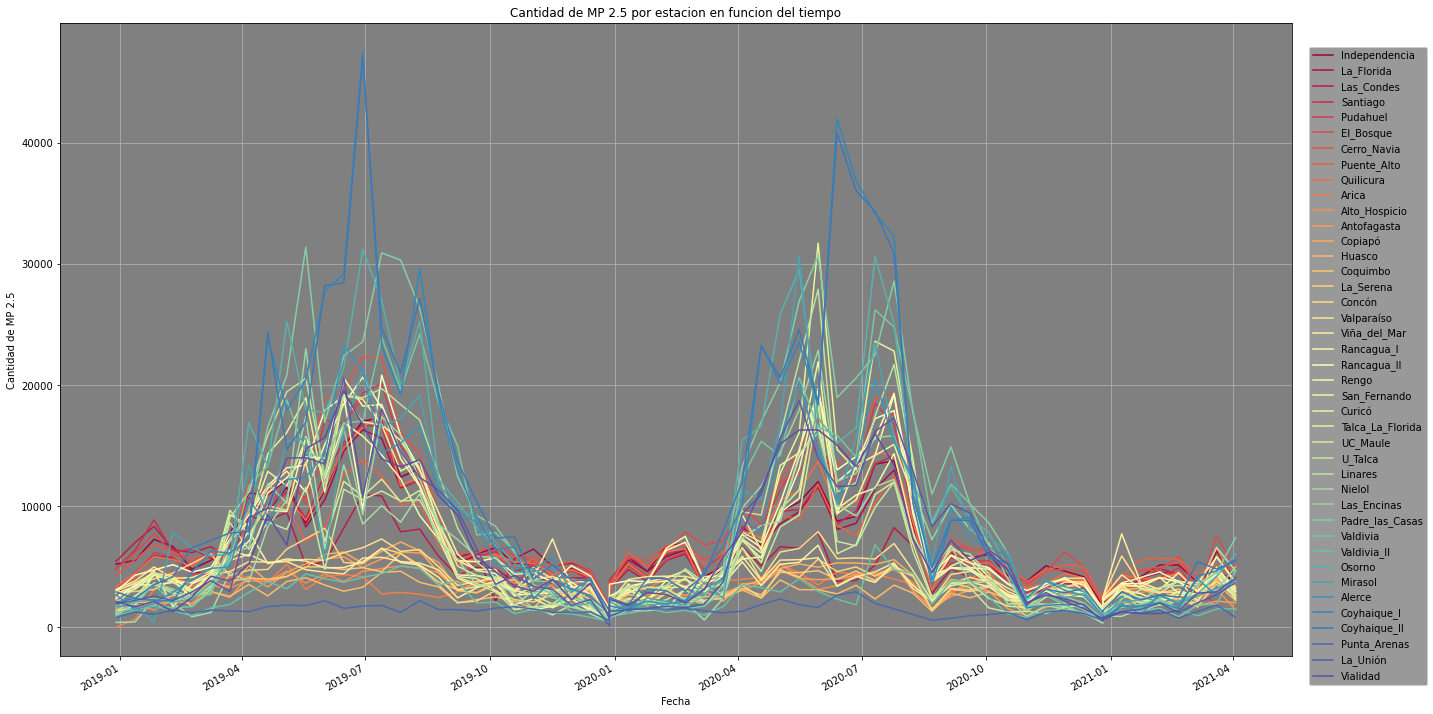

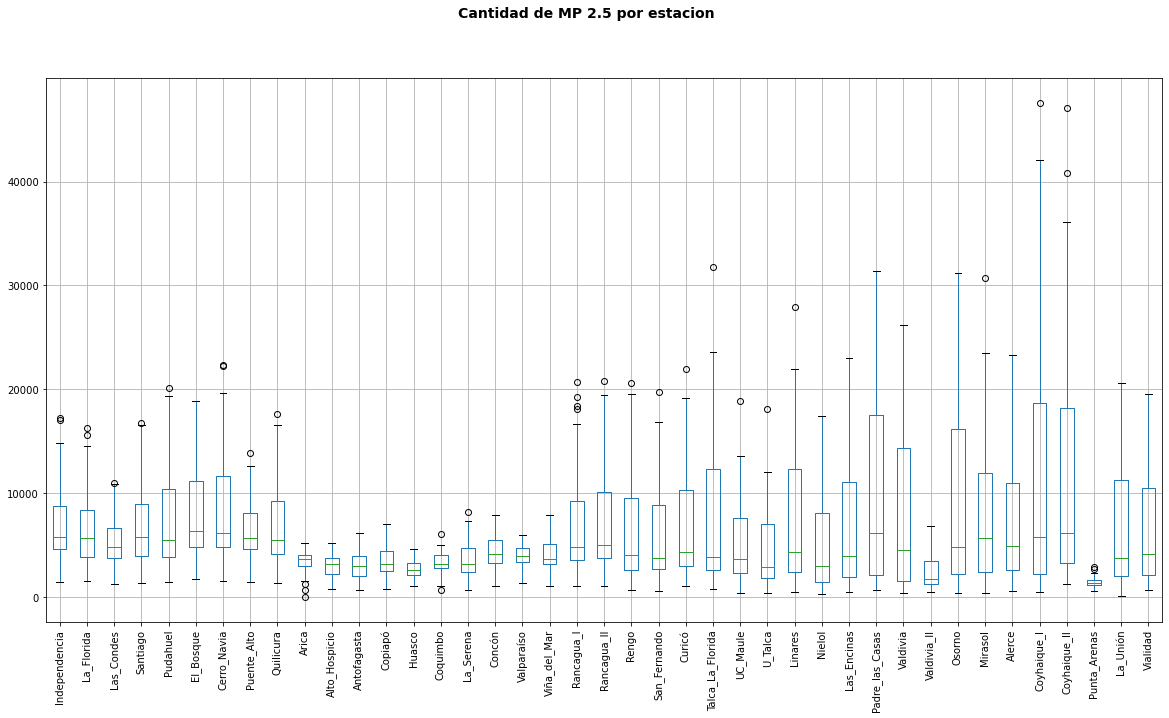

In [3]:
###### Data Product 43 - Datos de calidad del aire por hora #################################
#Se filtran datos agrupando por estación de medición de la contaminación
#Se agrupa cada 2 semanas, durante 2019,2020 y 2021 y del material particulado de 10 y 2.5 micrometros.

####### Caldiad del aire ############################
def calidad_del_aire(mp, anio, intervalo = '2W-SAT'):
    '''Extrae y filtra datos de calidad de aire en MP hasta 2020'''
    MP = dataRetrieval.get_MP(str(mp),str(anio))
    indices = MP['Nombre de estacion']
    MP = MP.drop(['Nombre de estacion', 'Talagante'], axis=1) #No habia suficiente información
    MP.index = indices
    MP = MP.transpose()
    MP = MP.drop(['Codigo region','Region' ,'Comuna','Codigo comuna','UTM_Este','UTM_Norte'], axis=1)
    MP = MP.transpose()
    MP.index = pd.to_datetime(list(MP.index.values))
    MP = MP.astype(float)
    MP = MP.resample( intervalo, closed='left', label='left' ).sum()
    MP.transpose()
    return MP

def calidad_del_aire_nuevo_formato(mp, anio =2021, intervalo = '2W-SAT'):
    '''Extrae y filtra datos de calidad de aire en MP desde esl 2021'''
    MP = dataRetrieval.get_MP(str(mp),str(anio))
    indices = MP['Nombre de estacion']
    MP = MP.drop(['Nombre de estacion','Talagante'], axis=1) #Talagante no tenia información en 2021
    MP.index = indices
    MP.index = pd.to_datetime(list(MP.index.values))
    MP = MP.astype(float)
    MP = MP.resample(intervalo, closed='left', label='left' ).sum()
    return MP

#MP 10 2019-2020-2021
MP = pd.concat([calidad_del_aire(10, 2019),calidad_del_aire(10, 2020)], axis=0)
MP = pd.concat([MP,calidad_del_aire_nuevo_formato(10,2021)], axis=0)
estacion_sin_lectura = MP.columns[MP.isna().any()].tolist()
MP = MP.drop(estacion_sin_lectura, axis = 1)
util_plot.plot_df(MP, 'Cantidad de MP 10 por estacion en funcion del tiempo', 'Cantidad de MP10')
util_plot.box_plot_df(MP, 'Cantidad de MP 10 por estacion')
MP.describe()

#MP 2.5 2019-2020-2021
MP2 = pd.concat([calidad_del_aire(2.5, 2019),calidad_del_aire(2.5, 2020)], axis=0)
MP2 = pd.concat([MP2,calidad_del_aire_nuevo_formato(2.5,2021)], axis=0)
estacion_sin_lectura = MP2.columns[MP2.isna().any()].tolist()
MP2 = MP2.drop(estacion_sin_lectura, axis = 1)
util_plot.plot_df(MP2, 'Cantidad de MP 2.5 por estacion en funcion del tiempo', 'Cantidad de MP 2.5',size = (20,11))
util_plot.box_plot_df(MP2, "Cantidad de MP 2.5 por estacion")


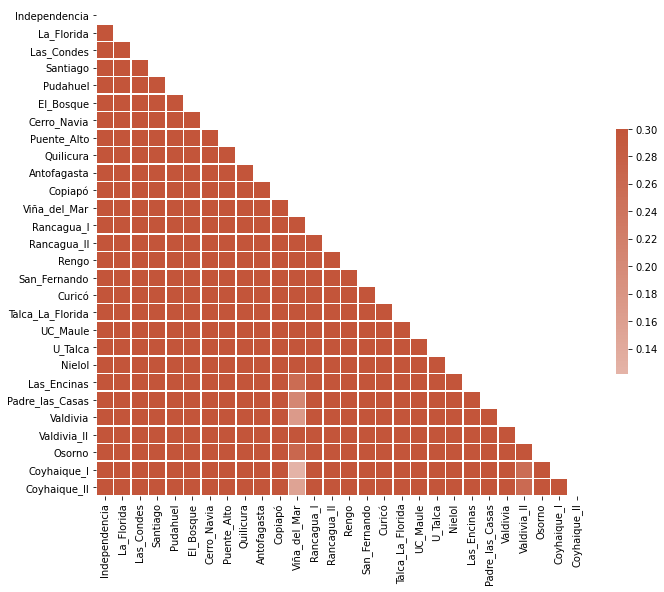

In [6]:
#Resumen estadístico de MP10
MP.describe()
util_plot.corr_plot_df(MP)

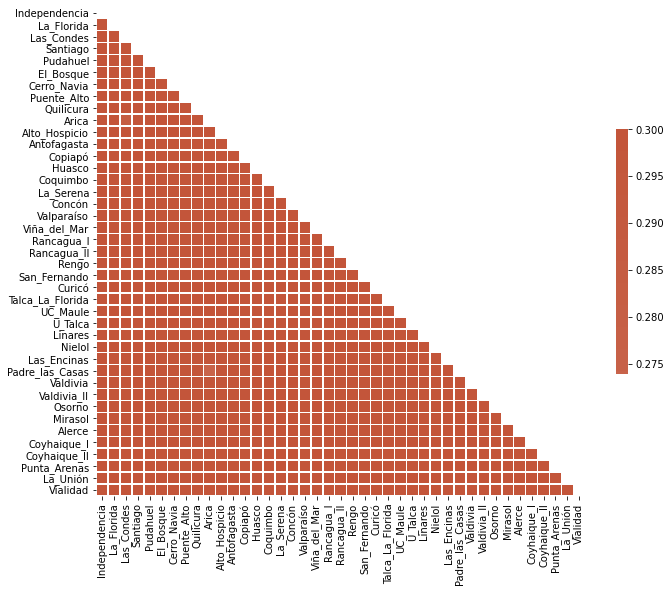

,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Quilicura,Arica,...,Valdivia,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,7006.532258,6583.806452,5222.935484,6767.290323,7349.483871,7904.306452,8469.580645,6438.177419,6821.854839,3431.239830,...,8205.661290,2336.306452,9454.758065,7901.693548,7287.145161,10893.709677,11373.983871,1409.480129,6741.275797,6457.000000
std,3604.784538,3574.611009,2199.728701,3764.634885,4922.030491,4314.643870,5305.275112,2800.505443,3853.671763,1020.211673,...,7724.528547,1408.445377,9049.920751,6641.376071,5880.982336,11692.763791,11170.078194,480.149726,5673.522874,5389.378616
min,1477.000000,1577.000000,1315.000000,1343.000000,1496.000000,1746.000000,1515.000000,1430.000000,1409.000000,0.000000,...,408.000000,470.000000,401.000000,420.000000,582.000000,497.000000,1237.000000,551.261938,126.000000,681.000000
25%,4611.750000,3855.000000,3765.500000,3922.000000,3893.250000,4847.750000,4847.500000,4641.500000,4117.250000,3011.405333,...,1578.500000,1251.750000,2223.750000,2459.750000,2654.500000,2187.750000,3308.250000,1159.215728,2023.750000,2180.250000
50%,5805.000000,5696.500000,4855.000000,5813.500000,5517.000000,6397.500000,6218.000000,5697.500000,5498.000000,3640.471501,...,4590.000000,1752.000000,4784.000000,5700.000000,4910.500000,5787.000000,6172.500000,1367.405399,3731.000000,4151.000000
75%,8746.750000,8429.500000,6632.500000,8987.750000,10374.250000,11172.250000,11673.250000,8095.000000,9228.750000,4068.794255,...,14345.500000,3503.000000,16226.750000,11918.500000,10947.000000,18682.000000,18181.250000,1635.545082,11242.500000,10484.500000
max,17285.000000,16321.000000,10965.000000,16720.000000,20132.000000,18882.000000,22329.000000,13842.000000,17604.000000,5257.956120,...,26224.000000,6838.000000,31207.000000,30672.000000,23305.000000,47552.000000,47063.000000,2936.007540,20657.000000,19543.000000


In [5]:
#Resumen estadístico de MP2.5
util_plot.corr_plot_df(MP2)
MP2.describe()

Estos datos en primera instancia se deben tratar con herramientas atingentes a series de tiempo, al igual que el resto y ayudaran a generar los modelos esperados al final del curso de minería de datos.

Otra variable que quizás pueda en principio ser ignorada, viene a la mente como un posible factor de medición de crecimiento del virus, o tambien como una medida de miedo o necesidad de protección a cercanos que son factor de riesgo. Las residencias sanitarias permiten a quienes se encuentran con PCR positivo, tener estadía aislados de sus cercanos y prevenir el contagio. Es por esto que no esta demás considerar esta variable dentro del pool utilizado para el modelo final.

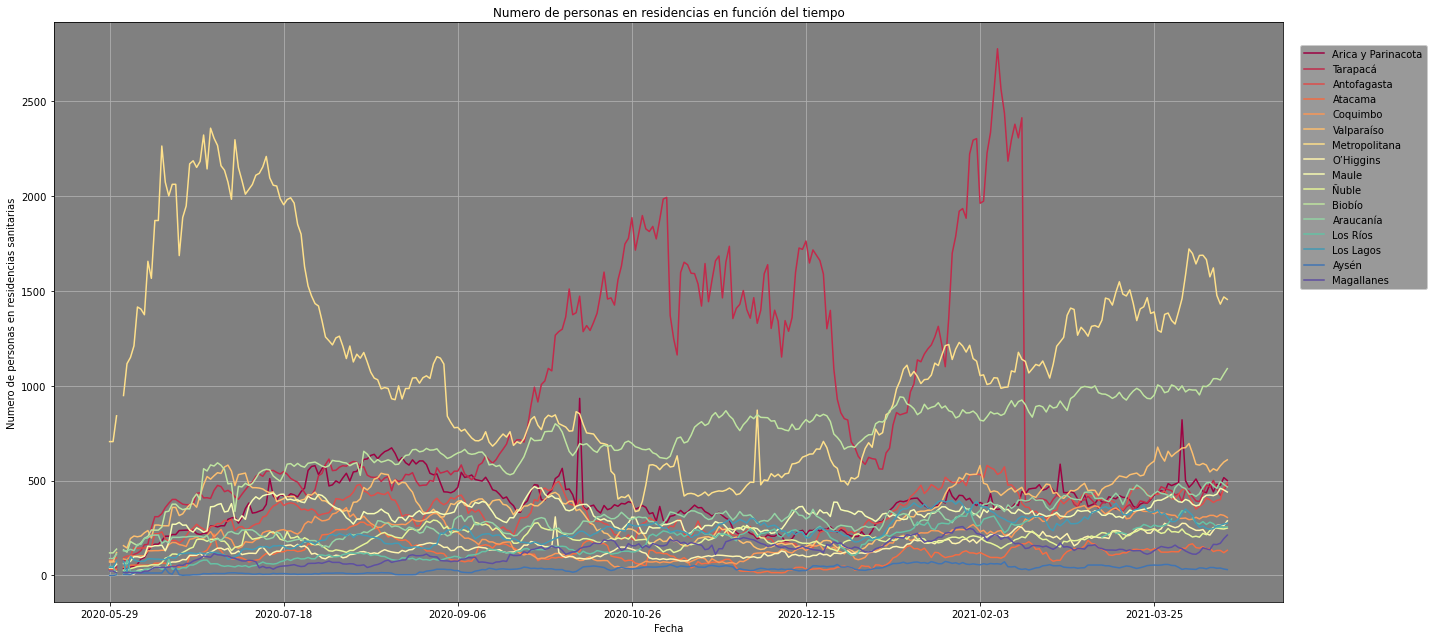

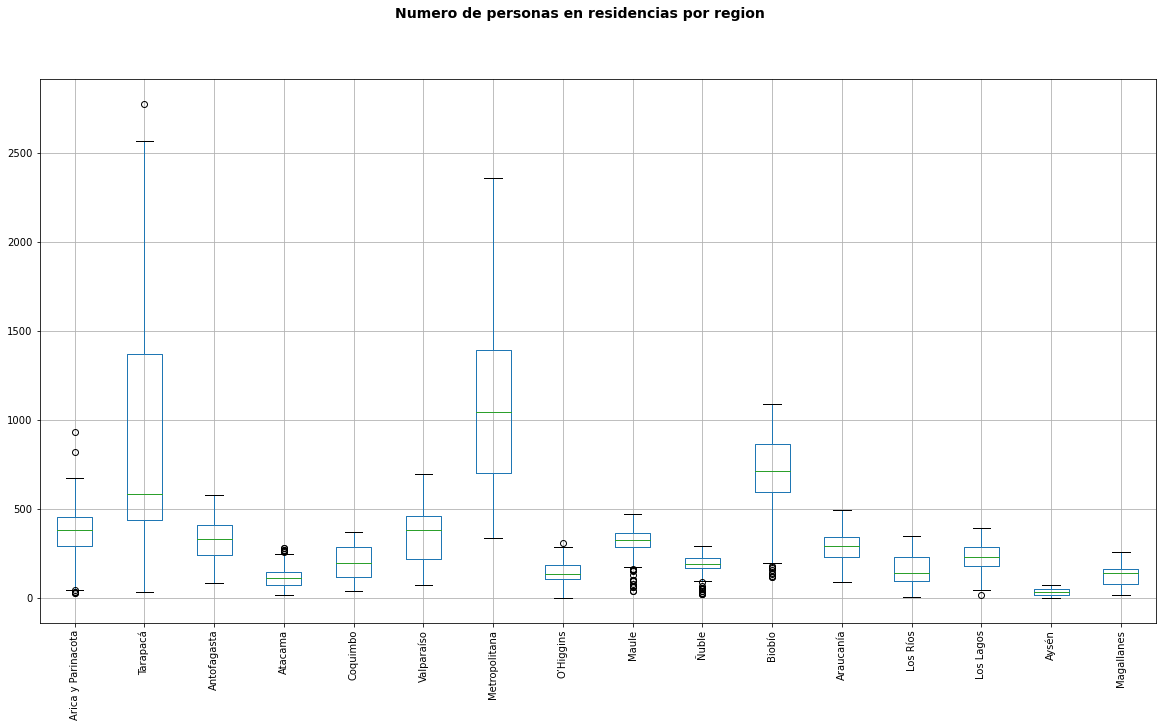

In [8]:
###### Data Product 36 - Residencias Sanitarias #################################
rs_x_reg = dataRetrieval.get_residencias()
# eliminamos los cupos totales y residencias:
rs_x_reg.drop(rs_x_reg[rs_x_reg["Categoria"] == "cupos totales"].index, inplace=True)
rs_x_reg.drop(rs_x_reg[rs_x_reg["Categoria"] == "residencias"].index, inplace=True)
#eliminamos la columna categoria
del rs_x_reg["Categoria"]
#seteamos los indices para que sean las regiones
rs_x_reg.set_index("Region", inplace=True)
#transponemos el dataframe
rs_x_reg=rs_x_reg.transpose()
#Ploteaos la serie de tiempo y su boxplot.
util_plot.plot_df(rs_x_reg, "Numero de personas en residencias en función del tiempo", "Numero de personas en residencias sanitarias")
util_plot.box_plot_df(rs_x_reg,"Numero de personas en residencias por region")
#Obs: Según lo observado, puede ser conveniente normalizar los datos respecto al 
#volumen poblacional con alguna métrica.

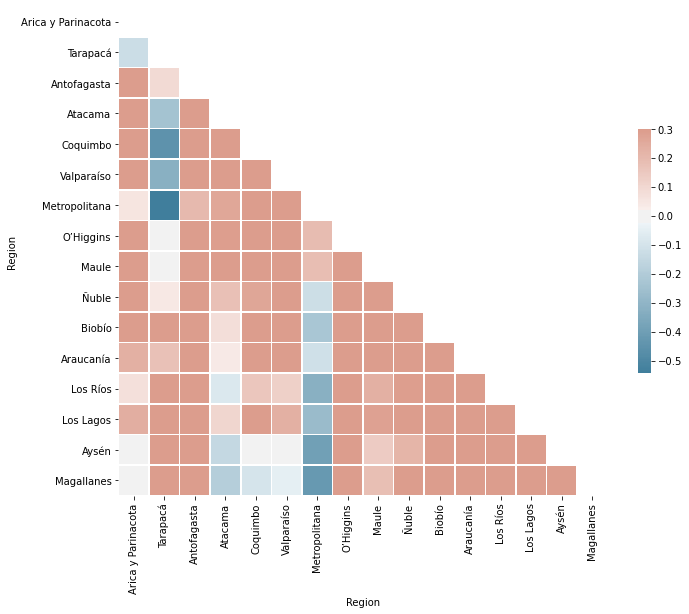

In [9]:
#Resumen estadísistico de residencias por region
rs_x_reg.describe()
util_plot.corr_plot_df(rs_x_reg)

Al igual que en el análisis de los nacimientos por región, el volumen de residencias es variado según la región y de hecho hay una región distinta de la Metropolitana que posee un gran crecimiento de las residencias totales ocupadas. Es por esto que puede ser importante analizar este caso que a primera impresión podría deber a algún factor migratorio o porpio del contexto de la región, cuestiones que deberan ser cuidadosamente analizadas y revisar si existen correlaciones importantes con tal hecho, ya que como se ve en la matriz de correlación, hay ciertas regiones que se correlacionan linealmente hasta en un 0,5 .

<!-- Posible intro de movilidad (?-->
relleno, es por esto que tambien se pone en la palestra la noción de como se mueve el virus, por esto el trabajo se enfocó tambien en recopilar datos de transacciones bip y movilidad aérea.

# Análisis Ricardo

# Análisis Javier:

# Análisis Nicolás: 